In [1]:
import pandas as pd

Data source: researched and gathered from multiple sources available online
objective: to cover all the opertaion typically used during eda

 Loading the NYC Yellow Taxi trip data for January 2023 from a Parquet file
into a pandas DataFrame so it can be analyzed and transformed.

In [2]:
nyc_taxi_data = pd.read_parquet('D:/Upskills/data/nyc_taxi/yellow_tripdata_2023-01.parquet')
nyc_taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


Loading the NYC Taxi zone data from a csv file

In [3]:
taxi_zone_lookup = pd.read_csv('D:/Upskills/data/nyc_taxi/taxi_zone_lookup.csv')
taxi_zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


Loading the NYC weather data  for January 2023 from a csv file

In [4]:
nyc_weather_data = pd.read_csv('D:/Upskills/data/weather/nyc_weather_2023_01.csv')
nyc_weather_data.head()

C:\Users\shails\AppData\Local\Temp\ipykernel_27572\3806187787.py:1: DtypeWarning: Columns (36,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_weather_data = pd.read_csv('D:/Upskills/data/weather/nyc_weather_2023_01.csv')


,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,OC1,OD1,OE1,OE2,OE3,RH1,RH2,RH3,REM,EQD
0,74486094789,2023-01-01T00:00:00,4,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SYN09874486 11104 /0000 10100 20100 30097 4010...,NaN
1,74486094789,2023-01-01T00:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET14812/31/22 19:51:03 METAR KJFK 010051Z 200...,NaN
2,74486094789,2023-01-01T01:49:00,6,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-16,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET12812/31/22 20:49:03 SPECI KJFK 010149Z 190...,NaN
3,74486094789,2023-01-01T01:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET14012/31/22 20:51:03 METAR KJFK 010151Z 190...,NaN
4,74486094789,2023-01-01T02:03:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-16,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET12012/31/22 21:03:03 SPECI KJFK 010203Z 190...,NaN


Inspect shapes rows

Checking the number of rows and columns to understand the size of the dataset 
and assess whether it represents large-scale, real-world data. 
The dataset should contain millions of rows, reflecting high taxi usage in NYC during January. 
Taxi zone lookup should be small (reference table)
Weather data should be relatively small (daily or hourly records)

In [5]:
print(nyc_taxi_data.shape)
print(taxi_zone_lookup.shape)
print(nyc_weather_data.shape)

(3066766, 19)
(265, 4)
(13423, 95)


Taxi trips dominate in volume and will drive performance considerations

Zone lookup is lightweight and safe to join repeatedly

Weather data is compact and suitable for temporal enrichment

The dataset is large, confirming the need for efficient processing and
justifying choices like Parquet format and vectorized operations.

In [6]:
rows, cols = nyc_taxi_data.shape
print(f"NYC Taxi Data: {rows} rows, {cols} columns")

rows, cols = taxi_zone_lookup.shape
print(f"Taxi Zone Lookup: {rows} rows, {cols} columns")

rows, cols = nyc_weather_data.shape
print(f"NYC Weather Data: {rows} rows, {cols} columns")

NYC Taxi Data: 3066766 rows, 19 columns
Taxi Zone Lookup: 265 rows, 4 columns
NYC Weather Data: 13423 rows, 95 columns


Inspecting the column names of the taxi trip,nyc zone, and nyc weather dataset to understand the available
features and identify which columns are relevant for analysis and modeling.

The output should list all columns such as pickup/dropoff timestamps,
location IDs, trip distance, fare-related fields, and passenger count.

also zone data should have sufficiant information and ability mark each zone seprately
and wether data should have lat loong and weather elated data


In [7]:
print(nyc_taxi_data.columns)
print(taxi_zone_lookup.columns)
print(nyc_weather_data.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')
Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')
Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AA3', 'AB1', 'AD1', 'AE1',
       'AH1', 'AH2', 'AH3', 'AH4', 'AH5', 'AH6', 'AI1', 'AI2', 'AI3', 'AI4',
       'AI5', 'AI6', 'AJ1', 'AK1', 'AL1', 'AM1', 'AN1', 'AT1', 'AT2', 'AT3',
       'AT4', 'AU1', 'AU2', 'AU3', 'AW1', 'AW2', 'AW3', 'AW4', 'AX1', 'AX2',
       'AX3', 'ED1', 'GA1', 'GA2', 'GA3', 'GD1', 'GD2', 'GD3', 'GD4', 'GE1',
       '

The dataset contains time-based, location-based, and numeric trip features,
and sufficient zone and weather data

In [8]:
print(nyc_taxi_data.columns.tolist())
print(taxi_zone_lookup.columns.tolist())
print(nyc_weather_data.columns.tolist())

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
['LocationID', 'Borough', 'Zone', 'service_zone']
['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG', 'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AA3', 'AB1', 'AD1', 'AE1', 'AH1', 'AH2', 'AH3', 'AH4', 'AH5', 'AH6', 'AI1', 'AI2', 'AI3', 'AI4', 'AI5', 'AI6', 'AJ1', 'AK1', 'AL1', 'AM1', 'AN1', 'AT1', 'AT2', 'AT3', 'AT4', 'AU1', 'AU2', 'AU3', 'AW1', 'AW2', 'AW3', 'AW4', 'AX1', 'AX2', 'AX3', 'ED1', 'GA1', 'GA2', 'GA3', 'GD1', 'GD2', 'GD3', 'GD4', 'GE1', 'GF1', 'KA1', 'KA2', 'KB1', 'KB2', 'KB3', 'KC1', 'KC2', 'KD1', 'KD2', 'KE1', 'KG1', 'KG2', 'MA1', 'MD1', 'MF1', 'MG1', 'MH1', 'MK1', 'MV

We are inspecting the data types of each column in the taxi trip dataset to identify:
Timestamps
Numeric measures
Categorical or flag variables

Pickup and dropoff times should be datetime types

Distance, fare-related fields should be numeric

Flags or IDs may be integers or objects

In [9]:
nyc_taxi_data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

columns are already properly typed columns may require type conversion like datetime parsing
This step is critical because incorrect dtypes silently break analysis, especially time-based aggregations.

In [10]:
taxi_zone_lookup.dtypes

LocationID       int64
Borough         object
Zone            object
service_zone    object
dtype: object

A date  column possibly as object
Numeric columns for weather measurements
Date columns need parsing
Weather metrics are stored as numeric values

In [11]:
print(nyc_weather_data.dtypes)

STATION        int64
DATE          object
SOURCE         int64
LATITUDE     float64
LONGITUDE    float64
              ...   
RH1           object
RH2           object
RH3           object
REM           object
EQD           object
Length: 95, dtype: object


Inspect index meaning 

In [12]:
print(nyc_taxi_data.index)
print(taxi_zone_lookup.index)
print(nyc_weather_data.index)

RangeIndex(start=0, stop=3066766, step=1)
RangeIndex(start=0, stop=265, step=1)
RangeIndex(start=0, stop=13423, step=1)


In [13]:
print(taxi_zone_lookup.index.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [14]:
print(nyc_taxi_data.tpep_pickup_datetime.dtypes)
print(nyc_taxi_data.tpep_dropoff_datetime.dtypes)
nyc_taxi_data.tpep_pickup_datetime.head()

datetime64[us]
datetime64[us]


0   2023-01-01 00:32:10
1   2023-01-01 00:55:08
2   2023-01-01 00:25:04
3   2023-01-01 00:03:48
4   2023-01-01 00:10:29
Name: tpep_pickup_datetime, dtype: datetime64[us]

In [15]:
nyc_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(nyc_taxi_data['tpep_pickup_datetime'])
nyc_taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(nyc_taxi_data['tpep_dropoff_datetime'])

In [16]:
print(nyc_taxi_data.tpep_pickup_datetime.dtypes)
print(nyc_taxi_data.tpep_dropoff_datetime.dtypes)
nyc_taxi_data.tpep_pickup_datetime.head()

datetime64[us]
datetime64[us]


0   2023-01-01 00:32:10
1   2023-01-01 00:55:08
2   2023-01-01 00:25:04
3   2023-01-01 00:03:48
4   2023-01-01 00:10:29
Name: tpep_pickup_datetime, dtype: datetime64[us]

Normalize timezones across datasets

In [17]:
print(nyc_weather_data.DATE.dtypes)

object


In [18]:
nyc_weather_data['DATE'] = pd.to_datetime(nyc_weather_data['DATE'])
print(nyc_weather_data.DATE.dtypes)

datetime64[ns]


datetime64[ns] =>ns = nanoseconds (10⁻⁹ seconds)
datetime64[us] =>us = microseconds (10⁻⁶ seconds)

In [19]:
nyc_taxi_data['tpep_pickup_datetime'] = (nyc_taxi_data['tpep_pickup_datetime'].astype('datetime64[ns]'))
nyc_taxi_data['tpep_dropoff_datetime'] = (nyc_taxi_data['tpep_dropoff_datetime'].astype('datetime64[ns]'))

print(nyc_taxi_data.tpep_pickup_datetime.dtypes)
print(nyc_taxi_data.tpep_dropoff_datetime.dtypes)
print(nyc_weather_data.DATE.dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


Check units and scales

In [20]:
nyc_taxi_data.trip_distance.head() #miles   

0    0.97
1    1.10
2    2.51
3    1.90
4    1.43
Name: trip_distance, dtype: float64

In [21]:
nyc_taxi_data.trip_distance.describe()

count    3.066766e+06
mean     3.847342e+00
std      2.495838e+02
min      0.000000e+00
25%      1.060000e+00
50%      1.800000e+00
75%      3.330000e+00
max      2.589281e+05
Name: trip_distance, dtype: float64

In [22]:
nyc_taxi_data['trip_distance_km'] = nyc_taxi_data['trip_distance'] * 1.60934
nyc_taxi_data.trip_distance_km.head() #kilometers

0    1.561060
1    1.770274
2    4.039443
3    3.057746
4    2.301356
Name: trip_distance_km, dtype: float64

In [23]:
nyc_taxi_data.fare_amount.head() # USD

0     9.3
1     7.9
2    14.9
3    12.1
4    11.4
Name: fare_amount, dtype: float64

In [24]:
fare_cols = [
    "fare_amount", "extra", "mta_tax",
    "tip_amount", "tolls_amount", "total_amount"
]

nyc_taxi_data[fare_cols].describe()


,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
count,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06
mean,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,2.702038e+01
std,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,2.216359e+01
min,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-7.510000e+02
25%,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.540000e+01
50%,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,2.016000e+01
75%,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,2.870000e+01
max,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.169400e+03


Time (local vs UTC)

In [25]:
nyc_taxi_data['tpep_pickup_datetime_local'] = pd.to_datetime(nyc_taxi_data['tpep_pickup_datetime'].dt.tz_localize('America/New_York'))
nyc_taxi_data['tpep_dropoff_datetime_local'] = pd.to_datetime(nyc_taxi_data['tpep_dropoff_datetime'].dt.tz_localize('America/New_York'))
# nyc_weather_data['DATE_local'] = pd.to_datetime(nyc_weather_data['DATE']).dt.tz_localize('America/New_York')

On March 12, 2023, clocks jumped from 01:59:59 to 03:00:00. The entire 2 a.m. hour was deleted from reality. Pandas sees that timestamp and says, correctly: “I cannot localize a moment that did not occur.”

What happened
2023-11-05 01:51:00 happened twice in New York.

On that date, clocks fell back from 02:00 to 01:00. The hour from 01:00 to 01:59 occurred once in EDT (UTC−4) and then again in EST (UTC−5). Pandas looks at 01:51 and says: “Which one do you mean?” Correctly.

This is the mirror image of the spring problem:

Spring forward → nonexistent times

Fall back → ambiguous times

You must choose a policy using the ambiguous argument.

Common, defensible options:

Assume the first occurrence (DST, UTC−4):

In [26]:
# For weather data, the standard assumption is usually standard time after the fallback (EST, UTC−5). That corresponds to:
nyc_weather_data["DATE_local"] = (
    pd.to_datetime(nyc_weather_data["DATE"])
      .dt.tz_localize(
          "America/New_York",
          ambiguous=False,
          nonexistent="shift_forward"
      )
)


pytz using python
nonexistent="shift_forward"
frontearshift - econimical based data
etc

temprory adjustment
handle diffrent timezone for diffrent region

ataset contains 2023-11-05 01:51:00, but not the duplicated hour as a sequence. From pandas’ point of view, this single timestamp could be either EDT or EST, and there’s no contextual evidence.

Once you lock in a policy (usually ambiguous=False for NYC winter data), your pipeline becomes stable, reproducible, and immune to DST-induced hallucinations.

In [27]:
print(nyc_taxi_data.tpep_pickup_datetime.info)
print(nyc_taxi_data.tpep_dropoff_datetime.dtypes)
print(nyc_weather_data.DATE.dtypes)

<bound method Series.info of 0         2023-01-01 00:32:10
1         2023-01-01 00:55:08
2         2023-01-01 00:25:04
3         2023-01-01 00:03:48
4         2023-01-01 00:10:29
                  ...        
3066761   2023-01-31 23:58:34
3066762   2023-01-31 23:31:09
3066763   2023-01-31 23:01:05
3066764   2023-01-31 23:40:00
3066765   2023-01-31 23:07:32
Name: tpep_pickup_datetime, Length: 3066766, dtype: datetime64[ns]>
datetime64[ns]
datetime64[ns]


In [28]:
nyc_taxi_data['tpep_pickup_datetime_utc'] = (nyc_taxi_data['tpep_pickup_datetime_local'].dt.tz_convert("UTC"))
nyc_taxi_data['tpep_dropoff_datetime_utc'] = (nyc_taxi_data['tpep_dropoff_datetime_local'].dt.tz_convert("UTC"))
nyc_weather_data['DATE_utc'] = (nyc_weather_data['DATE_local'].dt.tz_convert("UTC"))

In [29]:
nyc_taxi_data[['tpep_pickup_datetime', 'tpep_pickup_datetime_local', 'tpep_pickup_datetime_utc']].head()

,tpep_pickup_datetime,tpep_pickup_datetime_local,tpep_pickup_datetime_utc
0,2023-01-01 00:32:10,2023-01-01 00:32:10-05:00,2023-01-01 05:32:10+00:00
1,2023-01-01 00:55:08,2023-01-01 00:55:08-05:00,2023-01-01 05:55:08+00:00
2,2023-01-01 00:25:04,2023-01-01 00:25:04-05:00,2023-01-01 05:25:04+00:00
3,2023-01-01 00:03:48,2023-01-01 00:03:48-05:00,2023-01-01 05:03:48+00:00
4,2023-01-01 00:10:29,2023-01-01 00:10:29-05:00,2023-01-01 05:10:29+00:00


In [30]:
nyc_taxi_data[['tpep_dropoff_datetime', 'tpep_dropoff_datetime_local', 'tpep_dropoff_datetime_utc']].head()

,tpep_dropoff_datetime,tpep_dropoff_datetime_local,tpep_dropoff_datetime_utc
0,2023-01-01 00:40:36,2023-01-01 00:40:36-05:00,2023-01-01 05:40:36+00:00
1,2023-01-01 01:01:27,2023-01-01 01:01:27-05:00,2023-01-01 06:01:27+00:00
2,2023-01-01 00:37:49,2023-01-01 00:37:49-05:00,2023-01-01 05:37:49+00:00
3,2023-01-01 00:13:25,2023-01-01 00:13:25-05:00,2023-01-01 05:13:25+00:00
4,2023-01-01 00:21:19,2023-01-01 00:21:19-05:00,2023-01-01 05:21:19+00:00


In [31]:
nyc_weather_data[['DATE', 'DATE_local', 'DATE_utc']].head()

,DATE,DATE_local,DATE_utc
0,2023-01-01 00:00:00,2023-01-01 00:00:00-05:00,2023-01-01 05:00:00+00:00
1,2023-01-01 00:51:00,2023-01-01 00:51:00-05:00,2023-01-01 05:51:00+00:00
2,2023-01-01 01:49:00,2023-01-01 01:49:00-05:00,2023-01-01 06:49:00+00:00
3,2023-01-01 01:51:00,2023-01-01 01:51:00-05:00,2023-01-01 06:51:00+00:00
4,2023-01-01 02:03:00,2023-01-01 02:03:00-05:00,2023-01-01 07:03:00+00:00


Identify keys and identifiers

In [32]:
print(nyc_taxi_data.VendorID.is_unique)
print(taxi_zone_lookup.LocationID.is_unique)
print(nyc_weather_data.STATION.is_unique)

False
True
False


In [33]:
nyc_taxi_data["VendorID"].nunique() == len(nyc_taxi_data)
nyc_taxi_data["VendorID"].nunique()

2

In [34]:
nyc_taxi_data.duplicated(subset=["VendorID",  "tpep_pickup_datetime", "PULocationID", "DOLocationID"]).any()

np.True_

np.True means composite key does not identifies as unique row identifier
np.False_ means composite key does identifies as unique row identifier

In [35]:
nyc_weather_data.duplicated(subset=["STATION", "REM"]).any()

np.False_

Detect non-unique keys

In [36]:
candidate_keys = [
    ["VendorID"],
    ["VendorID", "tpep_pickup_datetime"],
    ["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime"],
    ["VendorID", "tpep_pickup_datetime", "PULocationID"]
]


In [37]:
for key_cols in candidate_keys:
    has_dupes = nyc_taxi_data.duplicated(subset=key_cols).any()
    print(f"{key_cols}: {'NON-UNIQUE' if has_dupes else 'UNIQUE'}")


['VendorID']: NON-UNIQUE
['VendorID', 'tpep_pickup_datetime']: NON-UNIQUE
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']: NON-UNIQUE
['VendorID', 'tpep_pickup_datetime', 'PULocationID']: NON-UNIQUE


In [38]:
for key_cols in candidate_keys:
    dupes = nyc_taxi_data[
        nyc_taxi_data.duplicated(subset=key_cols, keep=False)
    ]

    if not dupes.empty:
        print(f"\nKey {key_cols} has {len(dupes)} conflicting rows")
        print(dupes[key_cols].head())



Key ['VendorID'] has 3066766 conflicting rows
   VendorID
0         2
1         2
2         2
3         1
4         2

Key ['VendorID', 'tpep_pickup_datetime'] has 1737392 conflicting rows
   VendorID tpep_pickup_datetime
0         2  2023-01-01 00:32:10
2         2  2023-01-01 00:25:04
3         1  2023-01-01 00:03:48
5         2  2023-01-01 00:50:34
6         2  2023-01-01 00:09:22

Key ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'] has 52400 conflicting rows
     VendorID tpep_pickup_datetime tpep_dropoff_datetime
132         2  2023-01-01 00:28:29   2023-01-01 00:31:03
133         2  2023-01-01 00:28:29   2023-01-01 00:31:03
263         2  2023-01-01 00:20:18   2023-01-01 00:27:56
264         2  2023-01-01 00:20:18   2023-01-01 00:27:56
324         2  2023-01-01 00:52:22   2023-01-01 01:14:03

Key ['VendorID', 'tpep_pickup_datetime', 'PULocationID'] has 133649 conflicting rows
     VendorID tpep_pickup_datetime  PULocationID
20          1  2023-01-01 00:51:45       

Granularity answers: what is the smallest real-world event represented by one row?

In [39]:
nyc_taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'trip_distance_km', 'tpep_pickup_datetime_local',
       'tpep_dropoff_datetime_local', 'tpep_pickup_datetime_utc',
       'tpep_dropoff_datetime_utc'],
      dtype='object')

In [40]:
nyc_taxi_data.groupby(['VendorID', 'tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance', 'PULocationID', 'tolls_amount','total_amount',]).size().max()

np.int64(1)

In [41]:
nyc_taxi_data["pickup_hour"] = nyc_taxi_data["tpep_pickup_datetime"].dt.floor("h")

In [42]:
nyc_weather_data["DATE"].dt.floor("h").value_counts().head()

DATE
2023-12-04 06:00:00    7
2023-01-01 07:00:00    6
2023-01-01 04:00:00    6
2023-09-10 15:00:00    6
2023-04-30 21:00:00    6
Name: count, dtype: int64

In [43]:
expected_trip_cols = {
    "VendorID",
    "tpep_pickup_datetime",
    "tpep_dropoff_datetime",
    "PULocationID",
    "DOLocationID",
    "trip_distance",
    "fare_amount",
    "total_amount"
}

expected_trip_cols - set(nyc_taxi_data.columns)


set()

In [44]:
# Example placeholder logic (do not execute yet)
# weather_df.groupby("timestamp").agg("mean")


# 2. Data Understanding & Semantic Validation

In [45]:
fare_cols = [
    "fare_amount",
    "extra",
    "mta_tax",
    "tip_amount",
    "tolls_amount",
    "improvement_surcharge",
    "congestion_surcharge",
    "airport_fee"
]

nyc_taxi_data[fare_cols + ["total_amount"]].head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
0,9.3,1.00,0.5,0.00,0.0,1.0,2.5,0.00,14.30
1,7.9,1.00,0.5,4.00,0.0,1.0,2.5,0.00,16.90
2,14.9,1.00,0.5,15.00,0.0,1.0,2.5,0.00,34.90
3,12.1,7.25,0.5,0.00,0.0,1.0,0.0,1.25,20.85
4,11.4,1.00,0.5,3.28,0.0,1.0,2.5,0.00,19.68


In [46]:
(nyc_taxi_data["fare_amount"] <= nyc_taxi_data["total_amount"]).mean()

np.float64(0.9918405903808768)

In [47]:
nyc_taxi_data[fare_cols].sum()

fare_amount              56327501.54
extra                     4716200.22
mta_tax                   1497471.10
tip_amount               10328685.94
tolls_amount              1590089.52
improvement_surcharge     3011823.90
congestion_surcharge      6811375.00
airport_fee                321691.25
dtype: float64

In [48]:
nyc_taxi_data[fare_cols + ["total_amount"]].head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
0,9.3,1.00,0.5,0.00,0.0,1.0,2.5,0.00,14.30
1,7.9,1.00,0.5,4.00,0.0,1.0,2.5,0.00,16.90
2,14.9,1.00,0.5,15.00,0.0,1.0,2.5,0.00,34.90
3,12.1,7.25,0.5,0.00,0.0,1.0,0.0,1.25,20.85
4,11.4,1.00,0.5,3.28,0.0,1.0,2.5,0.00,19.68


Validate domain rules:
-  fare ≥ 0
-  distance ≥ 0
-  dropoff ≥ pickup

In [49]:
(nyc_taxi_data["fare_amount"] < 0).sum()

np.int64(25049)

In [50]:
print((nyc_taxi_data["trip_distance"] < 0).sum())
print((nyc_taxi_data["tpep_dropoff_datetime_local"] < nyc_taxi_data["tpep_pickup_datetime_local"]).sum())

0
3


In [51]:
invalid_time_mask = (
    nyc_taxi_data["tpep_dropoff_datetime"] <
    nyc_taxi_data["tpep_pickup_datetime"]
)

invalid_time_mask.sum()

np.int64(3)

In [52]:
numeric_cols = nyc_taxi_data.select_dtypes(include="number").columns.tolist()
datetime_cols = nyc_taxi_data.select_dtypes(include="datetime").columns.tolist()
categorical_cols = nyc_taxi_data.select_dtypes(include="object").columns.tolist()


In [53]:
numeric_cols, datetime_cols, categorical_cols


(['VendorID',
  'passenger_count',
  'trip_distance',
  'RatecodeID',
  'PULocationID',
  'DOLocationID',
  'payment_type',
  'fare_amount',
  'extra',
  'mta_tax',
  'tip_amount',
  'tolls_amount',
  'improvement_surcharge',
  'total_amount',
  'congestion_surcharge',
  'airport_fee',
  'trip_distance_km'],
 ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_hour'],
 ['store_and_fwd_flag'])

In [54]:
# Fare prediction
target_fare = "fare_amount"
# Trip duration prediction
nyc_taxi_data["trip_duration_sec"] = (
    nyc_taxi_data["tpep_dropoff_datetime"] -
    nyc_taxi_data["tpep_pickup_datetime"]
).dt.total_seconds()
nyc_taxi_data["trip_duration_sec"]

0           506.0
1           379.0
2           765.0
3           577.0
4           650.0
            ...  
3066761     839.0
3066762    1167.0
3066763    1471.0
3066764     780.0
3066765     864.0
Name: trip_duration_sec, Length: 3066766, dtype: float64

In [55]:
hourly_demand_df = (
    nyc_taxi_data
    .groupby("pickup_hour")
    .size()
    .rename("trip_count")
)
hourly_demand_df.head()

pickup_hour
2008-12-31 23:00:00    2
2022-10-24 17:00:00    1
2022-10-24 20:00:00    1
2022-10-24 21:00:00    1
2022-10-24 23:00:00    1
Name: trip_count, dtype: int64

In [56]:
leakage_candidates = [
    "total_amount",
    "tip_amount",
    "tolls_amount"
]

leakage_candidates
# Anything computed after the ride ends leaks future information for fare-at-pickup

['total_amount', 'tip_amount', 'tolls_amount']

Identify constant / near-constant columns

In [57]:
nunique_ratio = nyc_taxi_data.nunique() / len(nyc_taxi_data)

near_constant_cols = nunique_ratio[nunique_ratio < 0.001].index.tolist()
near_constant_cols

['VendorID',
 'passenger_count',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'extra',
 'mta_tax',
 'tolls_amount',
 'improvement_surcharge',
 'congestion_surcharge',
 'airport_fee',
 'pickup_hour']

trim whitespace

In [58]:
for col in categorical_cols:
    nyc_taxi_data[col] = nyc_taxi_data[col].str.strip()


Enforce casing

In [59]:
for col in categorical_cols:
    nyc_taxi_data[col] = nyc_taxi_data[col].str.lower()

Validate ID formats

In [60]:
nyc_taxi_data[["PULocationID", "DOLocationID"]].isna().mean()

PULocationID    0.0
DOLocationID    0.0
dtype: float64

Canonicalize categorical values

In [61]:
nyc_taxi_data["VendorID"] = nyc_taxi_data["VendorID"].astype("Int64")
nyc_taxi_data["payment_type"].value_counts(dropna=False)

payment_type
1    2411462
2     532241
0      71743
4      33297
3      18023
Name: count, dtype: int64

# 3. Data Quality Checks

In [62]:
nyc_taxi_data.isna().mean().sort_values(ascending=False)


RatecodeID                     0.023394
passenger_count                0.023394
store_and_fwd_flag             0.023394
congestion_surcharge           0.023394
airport_fee                    0.023394
VendorID                       0.000000
trip_distance                  0.000000
PULocationID                   0.000000
tpep_pickup_datetime           0.000000
tpep_dropoff_datetime          0.000000
payment_type                   0.000000
DOLocationID                   0.000000
mta_tax                        0.000000
fare_amount                    0.000000
tip_amount                     0.000000
tolls_amount                   0.000000
improvement_surcharge          0.000000
extra                          0.000000
total_amount                   0.000000
trip_distance_km               0.000000
tpep_pickup_datetime_local     0.000000
tpep_dropoff_datetime_local    0.000000
tpep_pickup_datetime_utc       0.000000
tpep_dropoff_datetime_utc      0.000000
pickup_hour                    0.000000


In [63]:
nyc_taxi_data.isna().sum()


VendorID                           0
tpep_pickup_datetime               0
tpep_dropoff_datetime              0
passenger_count                71743
trip_distance                      0
RatecodeID                     71743
store_and_fwd_flag             71743
PULocationID                       0
DOLocationID                       0
payment_type                       0
fare_amount                        0
extra                              0
mta_tax                            0
tip_amount                         0
tolls_amount                       0
improvement_surcharge              0
total_amount                       0
congestion_surcharge           71743
airport_fee                    71743
trip_distance_km                   0
tpep_pickup_datetime_local         0
tpep_dropoff_datetime_local        0
tpep_pickup_datetime_utc           0
tpep_dropoff_datetime_utc          0
pickup_hour                        0
trip_duration_sec                  0
dtype: int64

In [64]:
nyc_taxi_data.duplicated().sum()


np.int64(0)

In [65]:
nyc_taxi_data[nyc_taxi_data.duplicated(keep=False)].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,trip_distance_km,tpep_pickup_datetime_local,tpep_dropoff_datetime_local,tpep_pickup_datetime_utc,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec


Duplicate trip detection (same key-time window)

In [66]:
trip_identity_cols = [
    "VendorID",
    "tpep_pickup_datetime",
    "PULocationID",
    "DOLocationID",
    "trip_distance"
]

duplicate_trips = nyc_taxi_data.duplicated(
    subset=trip_identity_cols,
    keep=False
)

duplicate_trips.sum()


np.int64(44077)

Duplicate key detection (dimension keys)

In [67]:
taxi_zone_lookup["LocationID"].duplicated().sum()


np.int64(0)

Invalid category detection (payment types, rate codes)

In [68]:
nyc_taxi_data["payment_type"].value_counts(dropna=False)


payment_type
1    2411462
2     532241
0      71743
4      33297
3      18023
Name: count, dtype: int64

In [69]:
valid_payment_types = {1, 2, 3, 4, 5, 6}
set(nyc_taxi_data["payment_type"].dropna().unique()) - valid_payment_types


{np.int64(0)}

In [70]:
nyc_taxi_data["RatecodeID"].value_counts(dropna=False)


RatecodeID
1.0     2839305
2.0      114239
NaN       71743
5.0       15043
99.0      13106
3.0        8958
4.0        4366
6.0           6
Name: count, dtype: int64

Out-of-range value detection

In [71]:
nyc_taxi_data["trip_distance"].describe()


count    3.066766e+06
mean     3.847342e+00
std      2.495838e+02
min      0.000000e+00
25%      1.060000e+00
50%      1.800000e+00
75%      3.330000e+00
max      2.589281e+05
Name: trip_distance, dtype: float64

In [72]:
nyc_taxi_data.query("trip_distance > 100")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,trip_distance_km,tpep_pickup_datetime_local,tpep_dropoff_datetime_local,tpep_pickup_datetime_utc,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec
45939,2,2023-01-01 15:17:25,2023-01-01 17:09:49,1.0,105.55,5.0,n,132,265,1,...,250.00,0.0,0.0,169.865837,2023-01-01 15:17:25-05:00,2023-01-01 17:09:49-05:00,2023-01-01 20:17:25+00:00,2023-01-01 22:09:49+00:00,2023-01-01 15:00:00,6744.0
62642,2,2023-01-01 19:40:43,2023-01-01 20:21:48,1.0,62359.52,4.0,n,79,48,2,...,2.50,2.5,0.0,100357.669917,2023-01-01 19:40:43-05:00,2023-01-01 20:21:48-05:00,2023-01-02 00:40:43+00:00,2023-01-02 01:21:48+00:00,2023-01-01 19:00:00,2465.0
83278,2,2023-01-02 10:26:37,2023-01-02 12:23:13,3.0,114.27,5.0,n,93,265,1,...,351.00,0.0,0.0,183.899282,2023-01-02 10:26:37-05:00,2023-01-02 12:23:13-05:00,2023-01-02 15:26:37+00:00,2023-01-02 17:23:13+00:00,2023-01-02 10:00:00,6996.0
141672,2,2023-01-03 06:23:38,2023-01-03 09:23:57,1.0,105.24,1.0,n,48,132,1,...,400.65,2.5,0.0,169.366942,2023-01-03 06:23:38-05:00,2023-01-03 09:23:57-05:00,2023-01-03 11:23:38+00:00,2023-01-03 14:23:57+00:00,2023-01-03 06:00:00,10819.0
185956,2,2023-01-03 15:25:05,2023-01-03 16:09:02,1.0,9680.61,1.0,n,264,244,1,...,61.32,2.5,0.0,15579.392897,2023-01-03 15:25:05-05:00,2023-01-03 16:09:02-05:00,2023-01-03 20:25:05+00:00,2023-01-03 21:09:02+00:00,2023-01-03 15:00:00,2637.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064518,2,2023-01-31 06:41:00,2023-01-31 07:22:00,NaN,7729.75,NaN,None,143,257,0,...,57.44,NaN,NaN,12439.795865,2023-01-31 06:41:00-05:00,2023-01-31 07:22:00-05:00,2023-01-31 11:41:00+00:00,2023-01-31 12:22:00+00:00,2023-01-31 06:00:00,2460.0
3064664,2,2023-01-31 07:51:00,2023-01-31 08:09:00,NaN,9482.19,NaN,None,140,50,0,...,23.75,NaN,NaN,15260.067655,2023-01-31 07:51:00-05:00,2023-01-31 08:09:00-05:00,2023-01-31 12:51:00+00:00,2023-01-31 13:09:00+00:00,2023-01-31 07:00:00,1080.0
3064729,2,2023-01-31 07:18:00,2023-01-31 07:57:00,NaN,85543.66,NaN,None,41,87,0,...,51.80,NaN,NaN,137668.833784,2023-01-31 07:18:00-05:00,2023-01-31 07:57:00-05:00,2023-01-31 12:18:00+00:00,2023-01-31 12:57:00+00:00,2023-01-31 07:00:00,2340.0
3065107,2,2023-01-31 09:47:00,2023-01-31 10:12:00,NaN,3690.55,NaN,None,148,75,0,...,42.01,NaN,NaN,5939.349737,2023-01-31 09:47:00-05:00,2023-01-31 10:12:00-05:00,2023-01-31 14:47:00+00:00,2023-01-31 15:12:00+00:00,2023-01-31 09:00:00,1500.0


In [73]:
nyc_taxi_data.query("fare_amount > 500")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,trip_distance_km,tpep_pickup_datetime_local,tpep_dropoff_datetime_local,tpep_pickup_datetime_utc,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec
299813,2,2023-01-04 20:11:27,2023-01-04 22:15:19,1.0,103.80,4.0,n,132,265,2,...,667.10,0.0,1.25,167.049492,2023-01-04 20:11:27-05:00,2023-01-04 22:15:19-05:00,2023-01-05 01:11:27+00:00,2023-01-05 03:15:19+00:00,2023-01-04 20:00:00,7432.0
419633,2,2023-01-06 06:18:19,2023-01-06 07:47:12,2.0,80.38,4.0,n,132,265,2,...,550.35,0.0,1.25,129.358749,2023-01-06 06:18:19-05:00,2023-01-06 07:47:12-05:00,2023-01-06 11:18:19+00:00,2023-01-06 12:47:12+00:00,2023-01-06 06:00:00,5333.0
426145,2,2023-01-06 08:13:47,2023-01-06 08:14:09,3.0,0.00,5.0,n,265,265,2,...,551.35,0.0,0.00,0.000000,2023-01-06 08:13:47-05:00,2023-01-06 08:14:09-05:00,2023-01-06 13:13:47+00:00,2023-01-06 13:14:09+00:00,2023-01-06 08:00:00,22.0
470206,2,2023-01-06 16:53:01,2023-01-06 19:42:17,3.0,88.83,4.0,n,132,265,2,...,581.70,0.0,0.00,142.957672,2023-01-06 16:53:01-05:00,2023-01-06 19:42:17-05:00,2023-01-06 21:53:01+00:00,2023-01-07 00:42:17+00:00,2023-01-06 16:00:00,10156.0
526988,2,2023-01-07 04:29:56,2023-01-07 06:06:16,2.0,93.05,4.0,n,132,265,2,...,564.05,0.0,1.25,149.749087,2023-01-07 04:29:56-05:00,2023-01-07 06:06:16-05:00,2023-01-07 09:29:56+00:00,2023-01-07 11:06:16+00:00,2023-01-07 04:00:00,5780.0
558849,2,2023-01-07 14:01:46,2023-01-07 16:46:54,1.0,147.83,1.0,n,265,265,2,...,530.20,0.0,0.00,237.908732,2023-01-07 14:01:46-05:00,2023-01-07 16:46:54-05:00,2023-01-07 19:01:46+00:00,2023-01-07 21:46:54+00:00,2023-01-07 14:00:00,9908.0
633939,2,2023-01-08 07:11:36,2023-01-08 08:47:46,1.0,79.89,4.0,n,48,265,2,...,528.50,2.5,0.00,128.570173,2023-01-08 07:11:36-05:00,2023-01-08 08:47:46-05:00,2023-01-08 12:11:36+00:00,2023-01-08 13:47:46+00:00,2023-01-08 07:00:00,5770.0
634920,1,2023-01-08 08:15:40,2023-01-08 08:15:58,0.0,0.00,6.0,n,265,265,3,...,656.85,0.0,0.00,0.000000,2023-01-08 08:15:40-05:00,2023-01-08 08:15:58-05:00,2023-01-08 13:15:40+00:00,2023-01-08 13:15:58+00:00,2023-01-08 08:00:00,18.0
750805,1,2023-01-09 16:17:32,2023-01-09 16:20:41,1.0,0.00,5.0,n,141,141,3,...,1000.00,0.0,0.00,0.000000,2023-01-09 16:17:32-05:00,2023-01-09 16:20:41-05:00,2023-01-09 21:17:32+00:00,2023-01-09 21:20:41+00:00,2023-01-09 16:00:00,189.0
784024,1,2023-01-10 00:55:47,2023-01-10 00:56:53,1.0,0.00,5.0,n,48,48,3,...,626.00,0.0,0.00,0.000000,2023-01-10 00:55:47-05:00,2023-01-10 00:56:53-05:00,2023-01-10 05:55:47+00:00,2023-01-10 05:56:53+00:00,2023-01-10 00:00:00,66.0


Impossible value detection

Negative distance

In [74]:
nyc_taxi_data.query("trip_distance < 0")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,trip_distance_km,tpep_pickup_datetime_local,tpep_dropoff_datetime_local,tpep_pickup_datetime_utc,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec


Time going backwards

In [75]:
nyc_taxi_data.query(
    "tpep_dropoff_datetime < tpep_pickup_datetime"
)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,trip_distance_km,tpep_pickup_datetime_local,tpep_dropoff_datetime_local,tpep_pickup_datetime_utc,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec
1839180,1,2023-01-20 13:35:00,2023-01-20 13:05:48,1.0,0.8,99.0,n,227,14,1,...,18.0,0.0,0.0,1.287472,2023-01-20 13:35:00-05:00,2023-01-20 13:05:48-05:00,2023-01-20 18:35:00+00:00,2023-01-20 18:05:48+00:00,2023-01-20 13:00:00,-1752.0
2124414,1,2023-01-23 10:43:58,2023-01-23 10:29:26,1.0,2.4,99.0,n,102,82,1,...,23.0,0.0,0.0,3.862416,2023-01-23 10:43:58-05:00,2023-01-23 10:29:26-05:00,2023-01-23 15:43:58+00:00,2023-01-23 15:29:26+00:00,2023-01-23 10:00:00,-872.0
2218504,1,2023-01-24 11:00:00,2023-01-24 10:40:48,1.0,0.4,99.0,n,247,169,1,...,17.0,0.0,0.0,0.643736,2023-01-24 11:00:00-05:00,2023-01-24 10:40:48-05:00,2023-01-24 16:00:00+00:00,2023-01-24 15:40:48+00:00,2023-01-24 11:00:00,-1152.0


Cardinality inspection (zones, vendors)

In [76]:
nyc_taxi_data["PULocationID"].nunique()


257

Dropoff zones

In [77]:
nyc_taxi_data["DOLocationID"].nunique()


261

Vendors

In [78]:
nyc_taxi_data["VendorID"].value_counts(normalize=True)


VendorID
2    0.730215
1    0.269785
Name: proportion, dtype: Float64

3.9 Class imbalance detection

In [79]:
nyc_taxi_data["payment_type"].value_counts(normalize=True)


payment_type
1    0.786321
2    0.173551
0    0.023394
4    0.010857
3    0.005877
Name: proportion, dtype: float64

Referential integrity checks (zone IDs)

In [80]:
valid_zone_ids = set(taxi_zone_lookup["LocationID"])

invalid_pu = set(nyc_taxi_data["PULocationID"]) - valid_zone_ids
invalid_do = set(nyc_taxi_data["DOLocationID"]) - valid_zone_ids

invalid_pu, invalid_do


(set(), set())

Granularity conflict checks

In [81]:
nyc_taxi_data["pickup_hour"].dt.floor("H").value_counts().head()


C:\Users\shails\AppData\Local\Temp\ipykernel_27572\3442033066.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  nyc_taxi_data["pickup_hour"].dt.floor("H").value_counts().head()


pickup_hour
2023-01-12 18:00:00    9506
2023-01-26 18:00:00    8643
2023-01-19 18:00:00    8592
2023-01-25 18:00:00    8558
2023-01-11 18:00:00    8220
Name: count, dtype: int64

In [82]:
nyc_weather_data["DATE"].dt.floor("H").value_counts().head()

C:\Users\shails\AppData\Local\Temp\ipykernel_27572\972671695.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  nyc_weather_data["DATE"].dt.floor("H").value_counts().head()


DATE
2023-12-04 06:00:00    7
2023-01-01 07:00:00    6
2023-01-01 04:00:00    6
2023-09-10 15:00:00    6
2023-04-30 21:00:00    6
Name: count, dtype: int64

In [83]:
nyc_weather_data["DATE"].dt.floor("H").value_counts().head()


C:\Users\shails\AppData\Local\Temp\ipykernel_27572\475952102.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  nyc_weather_data["DATE"].dt.floor("H").value_counts().head()


DATE
2023-12-04 06:00:00    7
2023-01-01 07:00:00    6
2023-01-01 04:00:00    6
2023-09-10 15:00:00    6
2023-04-30 21:00:00    6
Name: count, dtype: int64

3.12 Temporal data integrity

Clock skew detection

In [84]:
nyc_taxi_data["trip_duration_sec"].describe()


count    3.066766e+06
mean     9.401397e+02
std      2.555661e+03
min     -1.752000e+03
25%      4.270000e+02
50%      6.910000e+02
75%      1.098000e+03
max      6.017510e+05
Name: trip_duration_sec, dtype: float64

In [85]:
nyc_taxi_data.query("trip_duration_sec > 6 * 3600")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,trip_distance_km,tpep_pickup_datetime_local,tpep_dropoff_datetime_local,tpep_pickup_datetime_utc,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec
383,2,2023-01-01 00:36:07,2023-01-02 00:17:13,1.0,1.20,1.0,n,234,234,1,...,16.40,2.5,0.00,1.931208,2023-01-01 00:36:07-05:00,2023-01-02 00:17:13-05:00,2023-01-01 05:36:07+00:00,2023-01-02 05:17:13+00:00,2023-01-01 00:00:00,85266.0
533,2,2023-01-01 00:21:42,2023-01-01 23:18:28,2.0,3.05,1.0,n,48,140,1,...,28.52,2.5,0.00,4.908487,2023-01-01 00:21:42-05:00,2023-01-01 23:18:28-05:00,2023-01-01 05:21:42+00:00,2023-01-02 04:18:28+00:00,2023-01-01 00:00:00,82606.0
546,2,2023-01-01 00:11:01,2023-01-01 23:37:57,1.0,1.68,1.0,n,138,129,1,...,23.34,0.0,1.25,2.703691,2023-01-01 00:11:01-05:00,2023-01-01 23:37:57-05:00,2023-01-01 05:11:01+00:00,2023-01-02 04:37:57+00:00,2023-01-01 00:00:00,84416.0
1244,2,2023-01-01 00:55:12,2023-01-02 00:52:12,1.0,3.43,1.0,n,170,239,2,...,26.20,2.5,0.00,5.520036,2023-01-01 00:55:12-05:00,2023-01-02 00:52:12-05:00,2023-01-01 05:55:12+00:00,2023-01-02 05:52:12+00:00,2023-01-01 00:00:00,86220.0
2510,2,2023-01-01 00:20:17,2023-01-01 23:55:57,1.0,2.58,1.0,n,246,231,2,...,19.90,2.5,0.00,4.152097,2023-01-01 00:20:17-05:00,2023-01-01 23:55:57-05:00,2023-01-01 05:20:17+00:00,2023-01-02 04:55:57+00:00,2023-01-01 00:00:00,84940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991021,2,2023-01-31 22:52:53,2023-02-01 22:51:43,2.0,1.11,1.0,n,48,161,1,...,16.32,2.5,0.00,1.786367,2023-01-31 22:52:53-05:00,2023-02-01 22:51:43-05:00,2023-02-01 03:52:53+00:00,2023-02-02 03:51:43+00:00,2023-01-31 22:00:00,86330.0
2993830,2,2023-01-31 18:21:09,2023-02-01 17:42:48,2.0,5.23,1.0,n,230,260,1,...,37.32,2.5,0.00,8.416848,2023-01-31 18:21:09-05:00,2023-02-01 17:42:48-05:00,2023-01-31 23:21:09+00:00,2023-02-01 22:42:48+00:00,2023-01-31 18:00:00,84099.0
2994073,2,2023-01-31 23:28:32,2023-02-01 23:18:41,1.0,2.78,1.0,n,162,114,1,...,22.08,2.5,0.00,4.473965,2023-01-31 23:28:32-05:00,2023-02-01 23:18:41-05:00,2023-02-01 04:28:32+00:00,2023-02-02 04:18:41+00:00,2023-01-31 23:00:00,85809.0
2994500,2,2023-01-31 23:17:12,2023-02-01 23:04:37,1.0,0.59,1.0,n,170,161,2,...,10.10,2.5,0.00,0.949511,2023-01-31 23:17:12-05:00,2023-02-01 23:04:37-05:00,2023-02-01 04:17:12+00:00,2023-02-02 04:04:37+00:00,2023-01-31 23:00:00,85645.0


Event sequencing correctness

In [86]:
nyc_taxi_data.sort_values("tpep_pickup_datetime").head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,trip_distance_km,tpep_pickup_datetime_local,tpep_dropoff_datetime_local,tpep_pickup_datetime_utc,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec
2138036,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,n,132,230,2,...,80.55,2.5,0.0,28.581878,2008-12-31 23:01:42-05:00,2009-01-01 14:29:11-05:00,2009-01-01 04:01:42+00:00,2009-01-01 19:29:11+00:00,2008-12-31 23:00:00,55649.0
209091,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,n,7,7,2,...,0.00,0.0,0.0,0.000000,2008-12-31 23:04:41-05:00,2009-01-01 19:55:36-05:00,2009-01-01 04:04:41+00:00,2009-01-02 00:55:36+00:00,2008-12-31 23:00:00,75055.0
10023,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,n,1,1,2,...,120.30,0.0,0.0,0.000000,2022-10-24 17:37:47-04:00,2022-10-24 17:37:51-04:00,2022-10-24 21:37:47+00:00,2022-10-24 21:37:51+00:00,2022-10-24 17:00:00,4.0
18219,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,n,17,17,1,...,54.36,0.0,0.0,0.000000,2022-10-24 20:01:46-04:00,2022-10-24 20:01:48-04:00,2022-10-25 00:01:46+00:00,2022-10-25 00:01:48+00:00,2022-10-24 20:00:00,2.0
21660,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,n,48,264,1,...,90.36,0.0,0.0,0.000000,2022-10-24 21:45:35-04:00,2022-10-24 21:45:38-04:00,2022-10-25 01:45:35+00:00,2022-10-25 01:45:38+00:00,2022-10-24 21:00:00,3.0


Latency distributions

<Axes: >

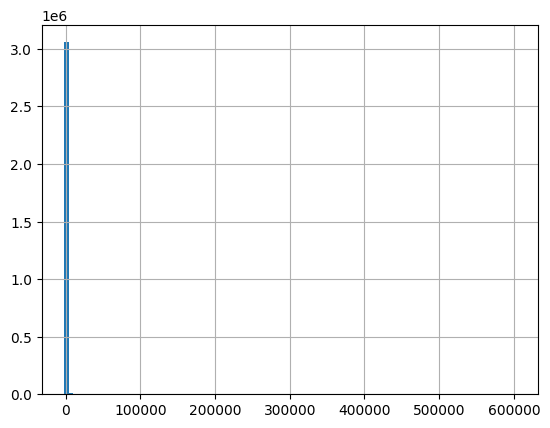

In [87]:
nyc_taxi_data["trip_duration_sec"].hist(bins=100)

Missing hours / days

In [88]:
hourly_index = pd.date_range(
    nyc_taxi_data["pickup_hour"].min(),
    nyc_taxi_data["pickup_hour"].max(),
    freq="H"
)

missing_hours = hourly_index.difference(
    nyc_taxi_data["pickup_hour"].unique()
)

len(missing_hours)


C:\Users\shails\AppData\Local\Temp\ipykernel_27572\3076304331.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(


122698

3.13 Calendar anomaly detection

nyc_taxi_data["is_weekend"] = (
    nyc_taxi_data["pickup_hour"].dt.weekday >= 5
)


Holidays

In [89]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(
    start=nyc_taxi_data["pickup_hour"].min(),
    end=nyc_taxi_data["pickup_hour"].max()
)

nyc_taxi_data["is_holiday"] = nyc_taxi_data["pickup_hour"].isin(holidays)


End-of-month effects

In [90]:
nyc_taxi_data["is_month_end"] = (
    nyc_taxi_data["pickup_hour"].dt.is_month_end
)

In [91]:
nyc_taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,airport_fee,trip_distance_km,tpep_pickup_datetime_local,tpep_dropoff_datetime_local,tpep_pickup_datetime_utc,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec,is_holiday,is_month_end
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,n,161,141,2,...,0.00,1.561060,2023-01-01 00:32:10-05:00,2023-01-01 00:40:36-05:00,2023-01-01 05:32:10+00:00,2023-01-01 05:40:36+00:00,2023-01-01 00:00:00,506.0,False,False
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,n,43,237,1,...,0.00,1.770274,2023-01-01 00:55:08-05:00,2023-01-01 01:01:27-05:00,2023-01-01 05:55:08+00:00,2023-01-01 06:01:27+00:00,2023-01-01 00:00:00,379.0,False,False
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,n,48,238,1,...,0.00,4.039443,2023-01-01 00:25:04-05:00,2023-01-01 00:37:49-05:00,2023-01-01 05:25:04+00:00,2023-01-01 05:37:49+00:00,2023-01-01 00:00:00,765.0,False,False
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,n,138,7,1,...,1.25,3.057746,2023-01-01 00:03:48-05:00,2023-01-01 00:13:25-05:00,2023-01-01 05:03:48+00:00,2023-01-01 05:13:25+00:00,2023-01-01 00:00:00,577.0,False,False
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,n,107,79,1,...,0.00,2.301356,2023-01-01 00:10:29-05:00,2023-01-01 00:21:19-05:00,2023-01-01 05:10:29+00:00,2023-01-01 05:21:19+00:00,2023-01-01 00:00:00,650.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,...,NaN,4.908487,2023-01-31 23:58:34-05:00,2023-02-01 00:12:33-05:00,2023-02-01 04:58:34+00:00,2023-02-01 05:12:33+00:00,2023-01-31 23:00:00,839.0,False,True
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,...,NaN,9.334172,2023-01-31 23:31:09-05:00,2023-01-31 23:50:36-05:00,2023-02-01 04:31:09+00:00,2023-02-01 04:50:36+00:00,2023-01-31 23:00:00,1167.0,False,True
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,...,NaN,7.515618,2023-01-31 23:01:05-05:00,2023-01-31 23:25:36-05:00,2023-02-01 04:01:05+00:00,2023-02-01 04:25:36+00:00,2023-01-31 23:00:00,1471.0,False,True
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,...,NaN,5.069421,2023-01-31 23:40:00-05:00,2023-01-31 23:53:00-05:00,2023-02-01 04:40:00+00:00,2023-02-01 04:53:00+00:00,2023-01-31 23:00:00,780.0,False,True


# 4. Combining Multiple Datasets (Data Integration)

Pre-Join Analysis<br>
Identify join keys

In [92]:
print(taxi_zone_lookup.columns)
print(nyc_taxi_data.columns)
print(nyc_weather_data.columns)

Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'trip_distance_km', 'tpep_pickup_datetime_local',
       'tpep_dropoff_datetime_local', 'tpep_pickup_datetime_utc',
       'tpep_dropoff_datetime_utc', 'pickup_hour', 'trip_duration_sec',
       'is_holiday', 'is_month_end'],
      dtype='object')
Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AA3', 'AB1', 'AD1', 'AE1',
       'AH1', 'AH2', 'AH3', 'AH4', 'AH5', 'AH6', 'AI1', 'AI2', 'AI3', 'AI4',
       

In [93]:
# nyc_taxi_data.PULocationID
# taxi_zone_lookup.LocationID
    
# nyc_taxi_data.tpep_pickup_datetimp
# nyc_weather_data.timestampe

Validate join key data types

In [94]:
nyc_taxi_data[['PULocationID', 'DOLocationID']].dtypes
taxi_zone_lookup['LocationID'].dtype

dtype('int64')

In [95]:
nyc_taxi_data['PULocationID'] = nyc_taxi_data['PULocationID'].astype('Int64')
nyc_taxi_data['DOLocationID'] = nyc_taxi_data['DOLocationID'].astype('Int64')
taxi_zone_lookup['LocationID'] = taxi_zone_lookup['LocationID'].astype('Int64')

In [96]:
nyc_taxi_data[['PULocationID', 'DOLocationID']].sort_values(by='PULocationID')

,PULocationID,DOLocationID
417663,1,1
65418,1,1
1538706,1,264
342787,1,1
1717818,1,1
...,...,...
25109,265,265
2766961,265,265
3048437,265,265
5182,265,265


In [97]:
taxi_zone_lookup['LocationID']

0        1
1        2
2        3
3        4
4        5
      ... 
260    261
261    262
262    263
263    264
264    265
Name: LocationID, Length: 265, dtype: Int64

Check key uniqueness

In [98]:
taxi_zone_lookup['LocationID'].is_unique

True

In [99]:
nyc_taxi_data['PULocationID'].is_unique

False

Analyze key overlap ?

In [100]:
set(nyc_taxi_data['PULocationID'].dropna().unique()) \
.intersection(set(taxi_zone_lookup['LocationID']))

{np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48),
 np.int64(49),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57),
 np.int64(58),
 np.int64(60),
 np.int64(61),
 np.int64(62),
 np.int64(63),
 np.int64(64),
 np.int64(65),
 np.int64(66),
 np.int64(67),
 np.int64(68),
 np.int64(69),
 np.

Detect orphan keys:These represent invalid or deprecated zones.

In [101]:
orphan_pu = (
    set(nyc_taxi_data['PULocationID'].dropna().unique())
    - set(taxi_zone_lookup['LocationID'])
)

len(orphan_pu)


0

Assess many-to-many join risk

In [102]:
nyc_taxi_data['PULocationID'].value_counts().describe()

count           257.0
mean     11932.941634
std      28732.987755
min               2.0
25%              57.0
50%             175.0
75%            1867.0
max          160030.0
Name: count, dtype: Float64

Row-wise Combinations
Vertical concatenation

In [103]:
taxi_all = pd.concat([nyc_taxi_data], axis=0)

Schema alignment before concat

In [104]:
taxi_all.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'trip_distance_km', 'tpep_pickup_datetime_local',
       'tpep_dropoff_datetime_local', 'tpep_pickup_datetime_utc',
       'tpep_dropoff_datetime_utc', 'pickup_hour', 'trip_duration_sec',
       'is_holiday', 'is_month_end'],
      dtype='object')

Column reconciliation ?

In [105]:
taxi_all.columns = taxi_all.columns.str.lower()

In [106]:
taxi_all.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'trip_distance_km', 'tpep_pickup_datetime_local',
       'tpep_dropoff_datetime_local', 'tpep_pickup_datetime_utc',
       'tpep_dropoff_datetime_utc', 'pickup_hour', 'trip_duration_sec',
       'is_holiday', 'is_month_end'],
      dtype='object')

Deduplication after concat

In [107]:
taxi_all.shape

(3066766, 28)

In [108]:
taxi_all = taxi_all.drop_duplicates()
taxi_all.shape

(3066766, 28)

Temporal ordering ?

In [109]:
taxi_all = taxi_all.sort_values('tpep_pickup_datetime_local')
taxi_all.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,airport_fee,trip_distance_km,tpep_pickup_datetime_local,tpep_dropoff_datetime_local,tpep_pickup_datetime_utc,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec,is_holiday,is_month_end
2138036,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,n,132,230,2,...,0.0,28.581878,2008-12-31 23:01:42-05:00,2009-01-01 14:29:11-05:00,2009-01-01 04:01:42+00:00,2009-01-01 19:29:11+00:00,2008-12-31 23:00:00,55649.0,False,True
209091,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,n,7,7,2,...,0.0,0.000000,2008-12-31 23:04:41-05:00,2009-01-01 19:55:36-05:00,2009-01-01 04:04:41+00:00,2009-01-02 00:55:36+00:00,2008-12-31 23:00:00,75055.0,False,True
10023,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,n,1,1,2,...,0.0,0.000000,2022-10-24 17:37:47-04:00,2022-10-24 17:37:51-04:00,2022-10-24 21:37:47+00:00,2022-10-24 21:37:51+00:00,2022-10-24 17:00:00,4.0,False,False
18219,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,n,17,17,1,...,0.0,0.000000,2022-10-24 20:01:46-04:00,2022-10-24 20:01:48-04:00,2022-10-25 00:01:46+00:00,2022-10-25 00:01:48+00:00,2022-10-24 20:00:00,2.0,False,False
21660,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,n,48,264,1,...,0.0,0.000000,2022-10-24 21:45:35-04:00,2022-10-24 21:45:38-04:00,2022-10-25 01:45:35+00:00,2022-10-25 01:45:38+00:00,2022-10-24 21:00:00,3.0,False,False


Column-wise Combinations

Index-based joins

In [110]:
taxi_idx = taxi_all.set_index('tpep_pickup_datetime_local')
weather_idx = nyc_weather_data.set_index('DATE_local')

In [111]:
taxi_idx.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'trip_distance_km', 'tpep_dropoff_datetime_local',
       'tpep_pickup_datetime_utc', 'tpep_dropoff_datetime_utc', 'pickup_hour',
       'trip_duration_sec', 'is_holiday', 'is_month_end'],
      dtype='object')

In [112]:
weather_idx.columns

Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AA3', 'AB1', 'AD1', 'AE1',
       'AH1', 'AH2', 'AH3', 'AH4', 'AH5', 'AH6', 'AI1', 'AI2', 'AI3', 'AI4',
       'AI5', 'AI6', 'AJ1', 'AK1', 'AL1', 'AM1', 'AN1', 'AT1', 'AT2', 'AT3',
       'AT4', 'AU1', 'AU2', 'AU3', 'AW1', 'AW2', 'AW3', 'AW4', 'AX1', 'AX2',
       'AX3', 'ED1', 'GA1', 'GA2', 'GA3', 'GD1', 'GD2', 'GD3', 'GD4', 'GE1',
       'GF1', 'KA1', 'KA2', 'KB1', 'KB2', 'KB3', 'KC1', 'KC2', 'KD1', 'KD2',
       'KE1', 'KG1', 'KG2', 'MA1', 'MD1', 'MF1', 'MG1', 'MH1', 'MK1', 'MV1',
       'MW1', 'MW2', 'MW3', 'OC1', 'OD1', 'OE1', 'OE2', 'OE3', 'RH1', 'RH2',
       'RH3', 'REM', 'EQD', 'DATE_utc'],
      dtype='object')

Side-by-side concatenation

In [113]:
side_by_side = pd.concat([taxi_idx, weather_idx], axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

taxi_idx.index is NOT unique

Thousands of trips occur in the same second

weather_idx.index is NOT unique

Weather observations repeat per station / report type

In [114]:
print(taxi_idx.index.is_unique)
print(weather_idx.index.is_unique)

False
False


In [115]:
print(taxi_idx.index.duplicated().sum())
print(weather_idx.index.duplicated().sum())

1455791
21


In [116]:
side_by_side = pd.concat(
    [taxi_idx.reset_index(), weather_idx.reset_index()],
    axis=1
)

Handling partial overlaps

In [117]:
side_by_side.isna().mean().sort_values(ascending=False).head(10)

AX3    0.999997
AH6    0.999997
AH5    0.999997
AH1    0.999997
AI1    0.999997
AI3    0.999997
AI4    0.999997
AI2    0.999997
AH3    0.999997
AH4    0.999997
dtype: float64

Column name conflict resolution

In [118]:
nyc_weather_data_prefixed = nyc_weather_data.add_prefix('wx_')
nyc_weather_data_prefixed.head()

,wx_STATION,wx_DATE,wx_SOURCE,wx_LATITUDE,wx_LONGITUDE,wx_ELEVATION,wx_NAME,wx_REPORT_TYPE,wx_CALL_SIGN,wx_QUALITY_CONTROL,...,wx_OE1,wx_OE2,wx_OE3,wx_RH1,wx_RH2,wx_RH3,wx_REM,wx_EQD,wx_DATE_local,wx_DATE_utc
0,74486094789,2023-01-01 00:00:00,4,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,SYN09874486 11104 /0000 10100 20100 30097 4010...,NaN,2023-01-01 00:00:00-05:00,2023-01-01 05:00:00+00:00
1,74486094789,2023-01-01 00:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,MET14812/31/22 19:51:03 METAR KJFK 010051Z 200...,NaN,2023-01-01 00:51:00-05:00,2023-01-01 05:51:00+00:00
2,74486094789,2023-01-01 01:49:00,6,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-16,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,MET12812/31/22 20:49:03 SPECI KJFK 010149Z 190...,NaN,2023-01-01 01:49:00-05:00,2023-01-01 06:49:00+00:00
3,74486094789,2023-01-01 01:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,MET14012/31/22 20:51:03 METAR KJFK 010151Z 190...,NaN,2023-01-01 01:51:00-05:00,2023-01-01 06:51:00+00:00
4,74486094789,2023-01-01 02:03:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-16,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,MET12012/31/22 21:03:03 SPECI KJFK 010203Z 190...,NaN,2023-01-01 02:03:00-05:00,2023-01-01 07:03:00+00:00


Relational Joins (Zones)

Inner join (Pickup zone)

In [119]:
taxi_pu_zone = taxi_all.merge(
    taxi_zone_lookup,
    left_on='pulocationid',
    right_on='LocationID',
    how='inner'
)
taxi_pu_zone.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,tpep_pickup_datetime_utc,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec,is_holiday,is_month_end,LocationID,Borough,Zone,service_zone
0,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,n,132,230,2,...,2009-01-01 04:01:42+00:00,2009-01-01 19:29:11+00:00,2008-12-31 23:00:00,55649.0,False,True,132,Queens,JFK Airport,Airports
1,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,n,7,7,2,...,2009-01-01 04:04:41+00:00,2009-01-02 00:55:36+00:00,2008-12-31 23:00:00,75055.0,False,True,7,Queens,Astoria,Boro Zone
2,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,n,1,1,2,...,2022-10-24 21:37:47+00:00,2022-10-24 21:37:51+00:00,2022-10-24 17:00:00,4.0,False,False,1,EWR,Newark Airport,EWR
3,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,n,17,17,1,...,2022-10-25 00:01:46+00:00,2022-10-25 00:01:48+00:00,2022-10-24 20:00:00,2.0,False,False,17,Brooklyn,Bedford,Boro Zone
4,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,n,48,264,1,...,2022-10-25 01:45:35+00:00,2022-10-25 01:45:38+00:00,2022-10-24 21:00:00,3.0,False,False,48,Manhattan,Clinton East,Yellow Zone


Left join

In [120]:
taxi_pu_zone = taxi_all.merge(
    taxi_zone_lookup,
    left_on='pulocationid',
    right_on='LocationID',
    how='left',
    indicator=True
)
taxi_pu_zone.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec,is_holiday,is_month_end,LocationID,Borough,Zone,service_zone,_merge
0,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,n,132,230,2,...,2009-01-01 19:29:11+00:00,2008-12-31 23:00:00,55649.0,False,True,132,Queens,JFK Airport,Airports,both
1,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,n,7,7,2,...,2009-01-02 00:55:36+00:00,2008-12-31 23:00:00,75055.0,False,True,7,Queens,Astoria,Boro Zone,both
2,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,n,1,1,2,...,2022-10-24 21:37:51+00:00,2022-10-24 17:00:00,4.0,False,False,1,EWR,Newark Airport,EWR,both
3,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,n,17,17,1,...,2022-10-25 00:01:48+00:00,2022-10-24 20:00:00,2.0,False,False,17,Brooklyn,Bedford,Boro Zone,both
4,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,n,48,264,1,...,2022-10-25 01:45:38+00:00,2022-10-24 21:00:00,3.0,False,False,48,Manhattan,Clinton East,Yellow Zone,both


Right join

In [121]:
taxi_zone_lookup.merge(
    taxi_all,
    left_on='LocationID',
    right_on='pulocationid',
    how='right'
)

,LocationID,Borough,Zone,service_zone,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,...,airport_fee,trip_distance_km,tpep_pickup_datetime_local,tpep_dropoff_datetime_local,tpep_pickup_datetime_utc,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec,is_holiday,is_month_end
0,132,Queens,JFK Airport,Airports,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,...,0.0,28.581878,2008-12-31 23:01:42-05:00,2009-01-01 14:29:11-05:00,2009-01-01 04:01:42+00:00,2009-01-01 19:29:11+00:00,2008-12-31 23:00:00,55649.0,False,True
1,7,Queens,Astoria,Boro Zone,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,...,0.0,0.000000,2008-12-31 23:04:41-05:00,2009-01-01 19:55:36-05:00,2009-01-01 04:04:41+00:00,2009-01-02 00:55:36+00:00,2008-12-31 23:00:00,75055.0,False,True
2,1,EWR,Newark Airport,EWR,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,...,0.0,0.000000,2022-10-24 17:37:47-04:00,2022-10-24 17:37:51-04:00,2022-10-24 21:37:47+00:00,2022-10-24 21:37:51+00:00,2022-10-24 17:00:00,4.0,False,False
3,17,Brooklyn,Bedford,Boro Zone,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,...,0.0,0.000000,2022-10-24 20:01:46-04:00,2022-10-24 20:01:48-04:00,2022-10-25 00:01:46+00:00,2022-10-25 00:01:48+00:00,2022-10-24 20:00:00,2.0,False,False
4,48,Manhattan,Clinton East,Yellow Zone,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,...,0.0,0.000000,2022-10-24 21:45:35-04:00,2022-10-24 21:45:38-04:00,2022-10-25 01:45:35+00:00,2022-10-25 01:45:38+00:00,2022-10-24 21:00:00,3.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,70,Queens,East Elmhurst,Boro Zone,2,2023-02-01 00:00:40,2023-02-01 00:23:03,5.0,10.12,1.0,...,0.0,16.286521,2023-02-01 00:00:40-05:00,2023-02-01 00:23:03-05:00,2023-02-01 05:00:40+00:00,2023-02-01 05:23:03+00:00,2023-02-01 00:00:00,1343.0,False,False
3066762,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,2,2023-02-01 00:00:55,2023-02-01 00:06:33,1.0,1.09,1.0,...,0.0,1.754181,2023-02-01 00:00:55-05:00,2023-02-01 00:06:33-05:00,2023-02-01 05:00:55+00:00,2023-02-01 05:06:33+00:00,2023-02-01 00:00:00,338.0,False,False
3066763,230,Manhattan,Times Sq/Theatre District,Yellow Zone,2,2023-02-01 00:01:10,2023-02-01 00:14:26,1.0,2.03,1.0,...,0.0,3.266960,2023-02-01 00:01:10-05:00,2023-02-01 00:14:26-05:00,2023-02-01 05:01:10+00:00,2023-02-01 05:14:26+00:00,2023-02-01 00:00:00,796.0,False,False
3066764,230,Manhattan,Times Sq/Theatre District,Yellow Zone,2,2023-02-01 00:13:10,2023-02-01 00:29:37,1.0,3.27,1.0,...,0.0,5.262542,2023-02-01 00:13:10-05:00,2023-02-01 00:29:37-05:00,2023-02-01 05:13:10+00:00,2023-02-01 05:29:37+00:00,2023-02-01 00:00:00,987.0,False,False


Outer join

In [122]:
taxi_all.merge(
    taxi_zone_lookup,
    left_on='pulocationid',
    right_on='LocationID',
    how='outer',
    indicator=True
)


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,tpep_dropoff_datetime_utc,pickup_hour,trip_duration_sec,is_holiday,is_month_end,LocationID,Borough,Zone,service_zone,_merge
0,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,n,1,1,2.0,...,2022-10-24 21:37:51+00:00,2022-10-24 17:00:00,4.0,False,False,1,EWR,Newark Airport,EWR,both
1,2,2022-10-25 03:45:46,2022-10-25 03:45:50,1.0,0.02,5.0,n,1,1,1.0,...,2022-10-25 07:45:50+00:00,2022-10-25 03:00:00,4.0,False,False,1,EWR,Newark Airport,EWR,both
2,2,2023-01-01 05:36:23,2023-01-01 05:36:27,2.0,0.00,5.0,n,1,1,1.0,...,2023-01-01 10:36:27+00:00,2023-01-01 05:00:00,4.0,False,False,1,EWR,Newark Airport,EWR,both
3,2,2023-01-01 08:17:01,2023-01-01 08:17:08,2.0,0.00,5.0,n,1,1,1.0,...,2023-01-01 13:17:08+00:00,2023-01-01 08:00:00,7.0,False,False,1,EWR,Newark Airport,EWR,both
4,2,2023-01-01 11:47:43,2023-01-01 11:47:51,4.0,0.00,5.0,n,1,1,1.0,...,2023-01-01 16:47:51+00:00,2023-01-01 11:00:00,8.0,False,False,1,EWR,Newark Airport,EWR,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066769,2,2023-01-31 23:13:16,2023-01-31 23:37:21,1.0,13.22,5.0,n,265,265,1.0,...,2023-02-01 04:37:21+00:00,2023-01-31 23:00:00,1445.0,False,True,265,NaN,Outside of NYC,NaN,both
3066770,2,2023-01-31 23:13:37,2023-01-31 23:13:55,2.0,0.00,5.0,n,265,265,1.0,...,2023-02-01 04:13:55+00:00,2023-01-31 23:00:00,18.0,False,True,265,NaN,Outside of NYC,NaN,both
3066771,1,2023-01-31 23:46:36,2023-01-31 23:46:40,1.0,0.00,1.0,n,265,265,1.0,...,2023-02-01 04:46:40+00:00,2023-01-31 23:00:00,4.0,False,True,265,NaN,Outside of NYC,NaN,both
3066772,2,2023-01-31 23:47:31,2023-02-01 00:06:31,1.0,8.46,5.0,n,265,265,2.0,...,2023-02-01 05:06:31+00:00,2023-01-31 23:00:00,1140.0,False,True,265,NaN,Outside of NYC,NaN,both


One-to-one validation

In [123]:
taxi_zone_lookup['LocationID'].is_unique


True

One-to-many validation

In [124]:
taxi_all.groupby('pulocationid').size().describe()


count       257.000000
mean      11932.941634
std       28732.987755
min           2.000000
25%          57.000000
50%         175.000000
75%        1867.000000
max      160030.000000
dtype: float64

Join validation rules

In [125]:
assert taxi_zone_lookup['LocationID'].is_unique

Time-Aware Joins (Weather)

Exact timestamp joins (failure case)

In [126]:
taxi_all.merge(
    nyc_weather_data_prefixed,
    left_on='tpep_pickup_datetime_local',
    right_on='wx_date_local',
    how='left'
).isna().mean().sort_values(ascending=False).head()


KeyError: 'wx_date_local'

In [127]:
taxi_sorted = taxi_all.sort_values('tpep_pickup_datetime_local')
weather_sorted = nyc_weather_data_prefixed.sort_values('wx_DATE_local')

taxi_weather = pd.merge_asof(
    taxi_sorted,
    weather_sorted,
    left_on='tpep_pickup_datetime_local',
    right_on='wx_DATE_local',
    direction='backward',
    tolerance=pd.Timedelta('1H')
)


C:\Users\shails\AppData\Local\Temp\ipykernel_27572\971872864.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta('1H')


In [128]:
taxi_weather.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,wx_OE1,wx_OE2,wx_OE3,wx_RH1,wx_RH2,wx_RH3,wx_REM,wx_EQD,wx_DATE_local,wx_DATE_utc
0,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,n,132,230,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,n,7,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,n,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,n,17,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,n,48,264,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


Forward join

In [129]:
pd.merge_asof(
    taxi_sorted,
    weather_sorted,
    left_on='tpep_pickup_datetime_local',
    right_on='wx_DATE_local',
    direction='forward',
    tolerance=pd.Timedelta('1H')
)


C:\Users\shails\AppData\Local\Temp\ipykernel_27572\548477110.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta('1H')


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,wx_OE1,wx_OE2,wx_OE3,wx_RH1,wx_RH2,wx_RH3,wx_REM,wx_EQD,wx_DATE_local,wx_DATE_utc
0,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,n,132,230,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,n,7,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,n,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,n,17,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,n,48,264,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-02-01 00:00:40,2023-02-01 00:23:03,5.0,10.12,1.0,n,70,75,1,...,NaN,NaN,NaN,NaN,NaN,NaN,MET09901/31/23 19:51:03 METAR KJFK 010051Z 340...,NaN,2023-02-01 00:51:00-05:00,2023-02-01 05:51:00+00:00
3066762,2,2023-02-01 00:00:55,2023-02-01 00:06:33,1.0,1.09,1.0,n,246,164,2,...,NaN,NaN,NaN,NaN,NaN,NaN,MET09901/31/23 19:51:03 METAR KJFK 010051Z 340...,NaN,2023-02-01 00:51:00-05:00,2023-02-01 05:51:00+00:00
3066763,2,2023-02-01 00:01:10,2023-02-01 00:14:26,1.0,2.03,1.0,n,230,162,1,...,NaN,NaN,NaN,NaN,NaN,NaN,MET09901/31/23 19:51:03 METAR KJFK 010051Z 340...,NaN,2023-02-01 00:51:00-05:00,2023-02-01 05:51:00+00:00
3066764,2,2023-02-01 00:13:10,2023-02-01 00:29:37,1.0,3.27,1.0,n,230,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,MET09901/31/23 19:51:03 METAR KJFK 010051Z 340...,NaN,2023-02-01 00:51:00-05:00,2023-02-01 05:51:00+00:00


Lag-aligned join

In [130]:
weather_sorted['wx_date_local_lag1h'] = (
    weather_sorted['wx_DATE_local'] + pd.Timedelta('1H')
)


C:\Users\shails\AppData\Local\Temp\ipykernel_27572\86593615.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  weather_sorted['wx_DATE_local'] + pd.Timedelta('1H')


Causality validation ?

In [131]:
taxi_all['pickup_hour'] = taxi_all['pickup_hour'].astype(int)
nyc_weather_data_prefixed['wx_hour'] = nyc_weather_data_prefixed['wx_DATE_local'].dt.hour

In [132]:
taxi_all['pickup_hour']

2138036    1230764400000000000
209091     1230764400000000000
10023      1666630800000000000
18219      1666641600000000000
21660      1666645200000000000
                  ...         
2994844    1675209600000000000
2993558    1675209600000000000
2992642    1675209600000000000
2929496    1675209600000000000
2929497    1675209600000000000
Name: pickup_hour, Length: 3066766, dtype: int64

In [133]:
nyc_weather_data_prefixed['wx_hour'] 

0         0
1         0
2         1
3         1
4         2
         ..
13418    20
13419    21
13420    21
13421    22
13422    23
Name: wx_hour, Length: 13423, dtype: int32

Composite key join

In [134]:
taxi_all.merge(
    nyc_weather_data_prefixed,
    left_on='pickup_hour',
    right_on='wx_hour',
    how='left'
)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,wx_OE2,wx_OE3,wx_RH1,wx_RH2,wx_RH3,wx_REM,wx_EQD,wx_DATE_local,wx_DATE_utc,wx_hour
0,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,n,132,230,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,n,7,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,n,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,n,17,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,n,48,264,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-02-01 00:00:40,2023-02-01 00:23:03,5.0,10.12,1.0,n,70,75,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3066762,2,2023-02-01 00:00:55,2023-02-01 00:06:33,1.0,1.09,1.0,n,246,164,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3066763,2,2023-02-01 00:01:10,2023-02-01 00:14:26,1.0,2.03,1.0,n,230,162,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3066764,2,2023-02-01 00:13:10,2023-02-01 00:29:37,1.0,3.27,1.0,n,230,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


Conditional join (precipitation events only)

In [135]:
taxi_all.merge(
    nyc_weather_data_prefixed[nyc_weather_data_prefixed['wx_AA1'].notna()],
    left_on='pickup_hour',
    right_on='wx_hour',
    how='left'
)


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,wx_OE2,wx_OE3,wx_RH1,wx_RH2,wx_RH3,wx_REM,wx_EQD,wx_DATE_local,wx_DATE_utc,wx_hour
0,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,n,132,230,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,n,7,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,n,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,n,17,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,n,48,264,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-02-01 00:00:40,2023-02-01 00:23:03,5.0,10.12,1.0,n,70,75,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3066762,2,2023-02-01 00:00:55,2023-02-01 00:06:33,1.0,1.09,1.0,n,246,164,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3066763,2,2023-02-01 00:01:10,2023-02-01 00:14:26,1.0,2.03,1.0,n,230,162,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3066764,2,2023-02-01 00:13:10,2023-02-01 00:29:37,1.0,3.27,1.0,n,230,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


Cross join

In [136]:
taxi_all.merge(
    nyc_weather_data_prefixed[['wx_STATION']],
    how='cross'
).head()


MemoryError: Unable to allocate 307. GiB for an array with shape (41165200018,) and data type int64

Post-Join Validation
Row count reconciliation

In [ ]:
len(taxi_all), len(taxi_weather)

(3066766, 3066766)

Null inflation analysis

In [ ]:
taxi_weather.isna().mean().sort_values(ascending=False).head(10)


wx_AB1    1.0
wx_AH2    1.0
wx_AH3    1.0
wx_AH1    1.0
wx_AE1    1.0
wx_AI2    1.0
wx_AI3    1.0
wx_AH6    1.0
wx_AI1    1.0
wx_AI4    1.0
dtype: float64

Duplicate creation detection

In [ ]:
taxi_weather.duplicated().sum()

np.int64(0)

Key coverage analysis

In [ ]:
taxi_weather['pulocationid'].isna().mean()


np.float64(0.0)

Leakage detection

In [ ]:
(taxi_weather['wx_DATE_local'] 
 > taxi_weather['tpep_pickup_datetime_local']).sum()


np.int64(0)

Drop helper columns

In [ ]:
taxi_weather = taxi_weather.drop(
    columns=['_merge', 'wx_date_local'],
    errors='ignore'
)


# 5. Target Variable Analysis

Candidate 1: Fare-based targets

In [ ]:
taxi_weather

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,wx_OE1,wx_OE2,wx_OE3,wx_RH1,wx_RH2,wx_RH3,wx_REM,wx_EQD,wx_DATE_local,wx_DATE_utc
0,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,n,132,230,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,n,7,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,n,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,n,17,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,n,48,264,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-02-01 00:00:40,2023-02-01 00:23:03,5.0,10.12,1.0,n,70,75,1,...,NaN,NaN,NaN,NaN,NaN,NaN,SYN08674486 12766 60105 10028 21089 30222 4023...,NaN,2023-02-01 00:00:00-05:00,2023-02-01 05:00:00+00:00
3066762,2,2023-02-01 00:00:55,2023-02-01 00:06:33,1.0,1.09,1.0,n,246,164,2,...,NaN,NaN,NaN,NaN,NaN,NaN,SYN08674486 12766 60105 10028 21089 30222 4023...,NaN,2023-02-01 00:00:00-05:00,2023-02-01 05:00:00+00:00
3066763,2,2023-02-01 00:01:10,2023-02-01 00:14:26,1.0,2.03,1.0,n,230,162,1,...,NaN,NaN,NaN,NaN,NaN,NaN,SYN08674486 12766 60105 10028 21089 30222 4023...,NaN,2023-02-01 00:00:00-05:00,2023-02-01 05:00:00+00:00
3066764,2,2023-02-01 00:13:10,2023-02-01 00:29:37,1.0,3.27,1.0,n,230,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,SYN08674486 12766 60105 10028 21089 30222 4023...,NaN,2023-02-01 00:00:00-05:00,2023-02-01 05:00:00+00:00


In [ ]:
taxi_weather[['fare_amount', 'total_amount']].describe()


,fare_amount,total_amount
count,3.066766e+06,3.066766e+06
mean,1.836707e+01,2.702038e+01
std,1.780782e+01,2.216359e+01
min,-9.000000e+02,-7.510000e+02
25%,8.600000e+00,1.540000e+01
50%,1.280000e+01,2.016000e+01
75%,2.050000e+01,2.870000e+01
max,1.160100e+03,1.169400e+03


In [ ]:
taxi_weather['trip_duration_sec'].describe()


count    3.066766e+06
mean     9.401397e+02
std      2.555661e+03
min     -1.752000e+03
25%      4.270000e+02
50%      6.910000e+02
75%      1.098000e+03
max      6.017510e+05
Name: trip_duration_sec, dtype: float64

In [ ]:
zone_hour_demand = (
    taxi_weather
    .groupby(['pulocationid', 'pickup_hour'])
    .size()
    .rename('trip_count')
    .reset_index()
)
zone_hour_demand.head()

,pulocationid,pickup_hour,trip_count
0,1,2022-10-24 17:00:00,1
1,1,2022-10-25 03:00:00,1
2,1,2023-01-01 05:00:00,1
3,1,2023-01-01 08:00:00,1
4,1,2023-01-01 11:00:00,1


Target distribution analysis

In [ ]:
taxi_weather['fare_amount'].describe(percentiles=[0.5, 0.9, 0.95, 0.99])


count    3.066766e+06
mean     1.836707e+01
std      1.780782e+01
min     -9.000000e+02
50%      1.280000e+01
90%      3.870000e+01
95%      6.530000e+01
99%      7.230000e+01
max      1.160100e+03
Name: fare_amount, dtype: float64

<Axes: >

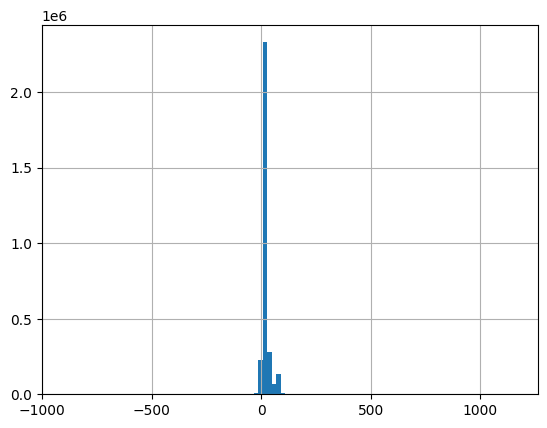

In [ ]:
taxi_weather['fare_amount'].hist(bins=100)


In [ ]:
taxi_weather['trip_duration_sec'].describe(percentiles=[0.5, 0.9, 0.95, 0.99])


count    3.066766e+06
mean     9.401397e+02
std      2.555661e+03
min     -1.752000e+03
50%      6.910000e+02
90%      1.676500e+03
95%      2.188000e+03
99%      3.435000e+03
max      6.017510e+05
Name: trip_duration_sec, dtype: float64

Heavy-tail detection

In [ ]:
fare_p99 = taxi_weather['fare_amount'].quantile(0.99)
duration_p99 = taxi_weather['trip_duration_sec'].quantile(0.99)

fare_p99, duration_p99


(np.float64(72.3), np.float64(3435.0))

In [ ]:
(taxi_weather['fare_amount'] > fare_p99).mean()


np.float64(0.009972068296048672)

Target outlier analysis

In [ ]:
taxi_weather[
    taxi_weather['fare_amount'] > fare_p99
][['fare_amount', 'trip_distance', 'trip_duration_sec']].head()


,fare_amount,trip_distance,trip_duration_sec
2,120.0,0.00,4.0
4,75.0,0.00,3.0
8,115.0,0.02,4.0
9,78.0,0.76,3.0
11,75.0,0.00,2.0


In [ ]:
taxi_weather[
    taxi_weather['trip_duration_sec'] > duration_p99
][['trip_duration_sec', 'trip_distance', 'fare_amount']].head()


,trip_duration_sec,trip_distance,fare_amount
0,55649.0,17.76,70.0
1,75055.0,0.00,0.0
583,84416.0,1.68,10.7
601,85420.0,1.28,8.6
899,4171.0,2.66,52.7


Target transformation

In [ ]:
import numpy as np

taxi_weather['fare_amount_log'] = np.log1p(taxi_weather['fare_amount'])


c:\Users\shails\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\shails\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
taxi_weather['fare_amount_log'].head()

0    4.262680
1    0.000000
2    4.795791
3    3.828641
4    4.330733
Name: fare_amount_log, dtype: float64

Temporal leakage checks

In [ ]:
taxi_weather[['fare_amount', 'wx_TMP']]

,fare_amount,wx_TMP
0,70.0,NaN
1,0.0,NaN
2,120.0,NaN
3,45.0,NaN
4,75.0,NaN
...,...,...
3066761,40.8,"+0028,1"
3066762,7.9,"+0028,1"
3066763,13.5,"+0028,1"
3066764,19.1,"+0028,1"


In [ ]:
nyc_weather_data['TMP'].dtypes

dtype('O')

In [ ]:
taxi_weather['wx_TMP'].dtypes

dtype('O')

In [ ]:
# 1. Replace the comma with a dot so it's a valid float format
taxi_weather['wx_TMP'] = taxi_weather['wx_TMP'].str.replace(',', '.')

# 2. Convert to float; invalid values become NaN
taxi_weather['wx_TMP'] = pd.to_numeric(taxi_weather['wx_TMP'], errors='coerce')

# Now check the type again
print(taxi_weather['wx_TMP'].dtype)

float64


In [ ]:
taxi_weather['wx_TMP'].describe()

count    3.066766e+06
mean     9.950713e+01
std      6.586256e+02
min     -1.750000e+01
25%      3.350000e+01
50%      5.050000e+01
75%      7.850000e+01
max      9.999900e+03
Name: wx_TMP, dtype: float64

In [ ]:
taxi_weather['wx_TMP'] = taxi_weather['wx_TMP'].fillna('0.0')
taxi_weather['wx_TMP'] = float(taxi_weather['wx_TMP'])
# taxi_weather['wx_TMP'] = taxi_weather['wx_TMP'].replace('+', '')
taxi_weather['wx_TMP'] = taxi_weather['wx_TMP'].astype('float')
taxi_weather[['fare_amount', 'wx_TMP']]


TypeError: cannot convert the series to <class 'float'>

In [ ]:
taxi_weather[['fare_amount', 'wx_TMP']].corr()


,fare_amount,wx_TMP
fare_amount,1.000000,0.032139
wx_TMP,0.032139,1.000000
